In [56]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import transitFinderFunctions as tff
from astropy.io import fits
from PlanetGenerationExtreme import generate_random_planet_systems, process_system
from transitFinderExtreme import TransitModel, load_model
import importlib
import torch

# Reload the courseworkb module to ensure the latest version is used
importlib.reload(tff)


<module 'transitFinderFunctions' from '/home/omcevoy/AstroCourseworkB/transitFinderFunctions.py'>

In [57]:

def analyze_light_curves(kepler_dataframe, model, device):
    model.eval()
    results = []

    time_array = kepler_dataframe['time'].values
    flux_array = kepler_dataframe['flux'].values

    length_of_input = np.arange(0, 1600, 0.02043357)
    full_flux = np.ones(len(length_of_input), dtype=np.float32)
    time_to_index = {t: i for i, t in enumerate(length_of_input)}

    # Match each flux to the closest time in length_of_input
    for t, flux in zip(time_array, flux_array):
        closest_time = min(length_of_input, key=lambda x: abs(x - t))
        print(f"Closest time: {closest_time}",end='\r')
        if closest_time in time_to_index:
            full_flux[time_to_index[closest_time]] = flux

    tff.plot_light_curve(length_of_input, full_flux)

    # Convert to tensor
    flux_tensor = torch.tensor(full_flux, dtype=torch.float32).unsqueeze(0).to(device)

    with torch.no_grad():
        predicted_periods, predicted_num_planets = model(flux_tensor)  # Model output: predicted periods and number of planets
        predicted_periods = predicted_periods.squeeze(0).cpu().numpy()
        predicted_num_planets = predicted_num_planets.item()

    print(f"Predicted periods: {predicted_periods}")
    print(f"Predicted number of planets: {predicted_num_planets}")

    results.append((predicted_periods, predicted_num_planets))
    return results

def plot_light_curves(kepler_dataframe, results):
    time_array = kepler_dataframe['time'].values
    flux_array = kepler_dataframe['flux'].values

    predicted_periods, predicted_num_planets = results[0]

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.plot(time_array, flux_array, label='Light curve')
    ax.set_xlabel('Time')
    ax.set_ylabel('Flux')
    ax.set_title(f'Light curve\nPredicted periods: {predicted_periods}, Predicted number of planets: {predicted_num_planets}')
    ax.legend()

    plt.tight_layout()
    plt.show()


4375 4375 4375
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 1639
4780 4780 4780


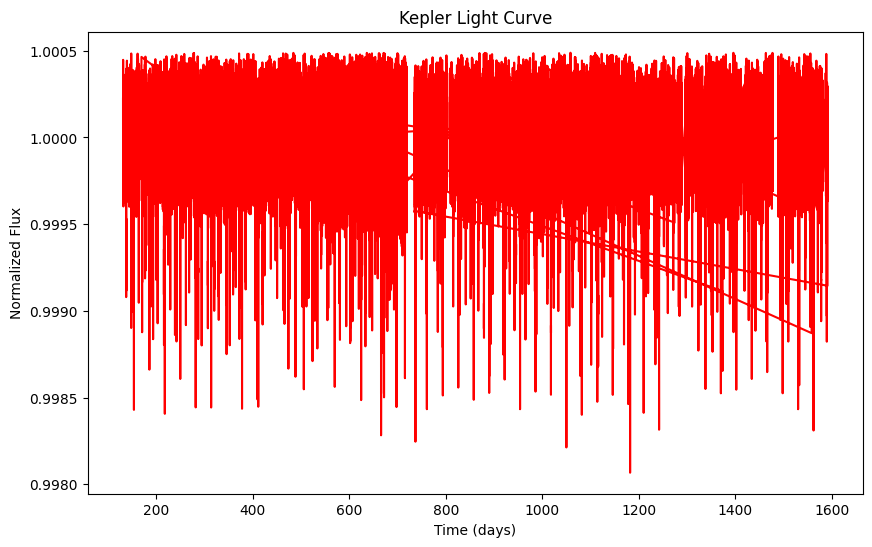

In [58]:

fits_file_path = file_path = 'CourseworkData/Objectlc'
device = "cpu"# torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = load_model("1_AlignedPeriodAndPlanetOnePercentTheGoodModeltransit_model_5_percent_weight_decay.pth", device)

kepler_dataframe = tff.loadDataFromFitsFiles(fits_file_path,filter_type='medfilt')

tff.plot_light_curve(kepler_dataframe['time'], kepler_dataframe['flux'])
results = analyze_light_curves(kepler_dataframe, model, device)
plot_light_curves(kepler_dataframe,results)
